In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split



In [44]:
%matplotlib inline

In [45]:
#%matplotlib qt

In [46]:
def sklearn_to_df(sklearn_dataset) :
    df = pd.DataFrame(sklearn_dataset.data , columns = sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_boston = sklearn_to_df(datasets.load_boston())

C:\Users\KhadijehValipour\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [47]:
df_boston.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [48]:
df_boston.shape

(506, 14)

In [49]:
df_boston.rename(columns={'target' : 'Price'} ,inplace=True)


<Axes: >

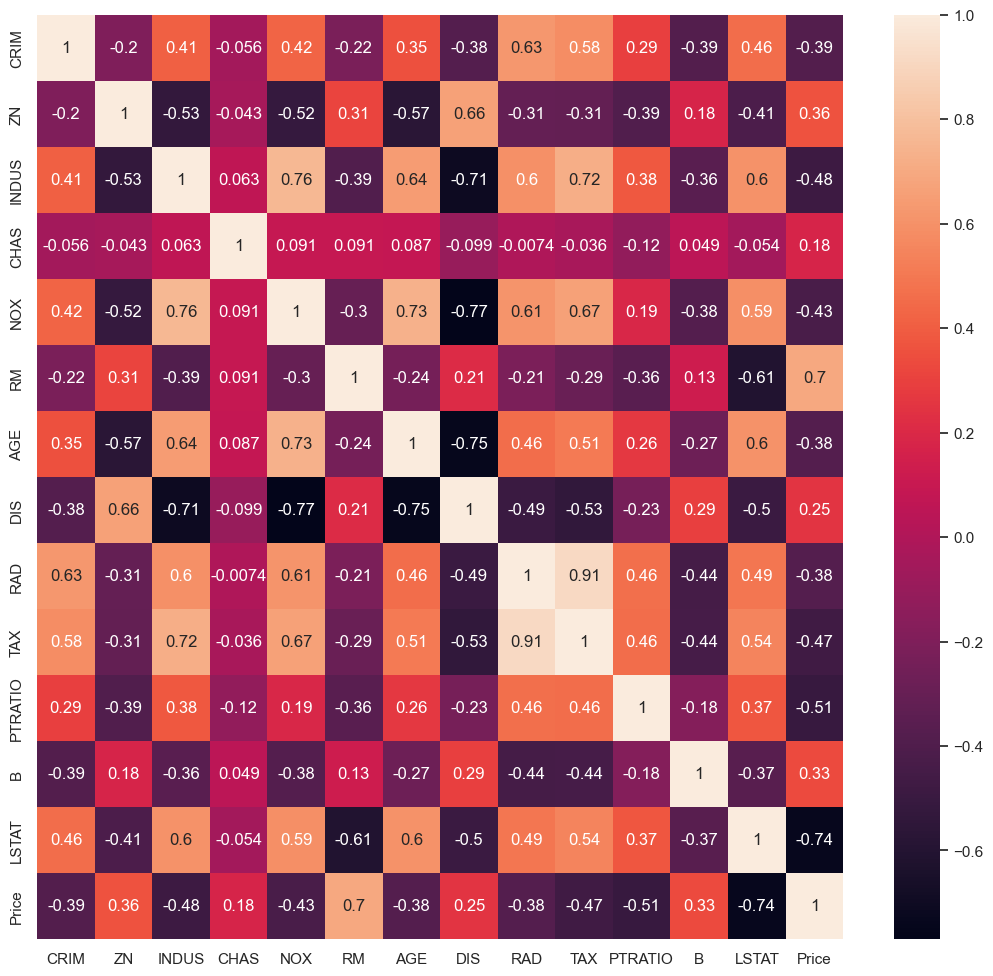

In [50]:
corr =df_boston.corr().round(2)
plt.figure(figsize=(13,12))
sns.heatmap(df_boston.corr() , annot=True)

C:\Users\KhadijehValipour\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


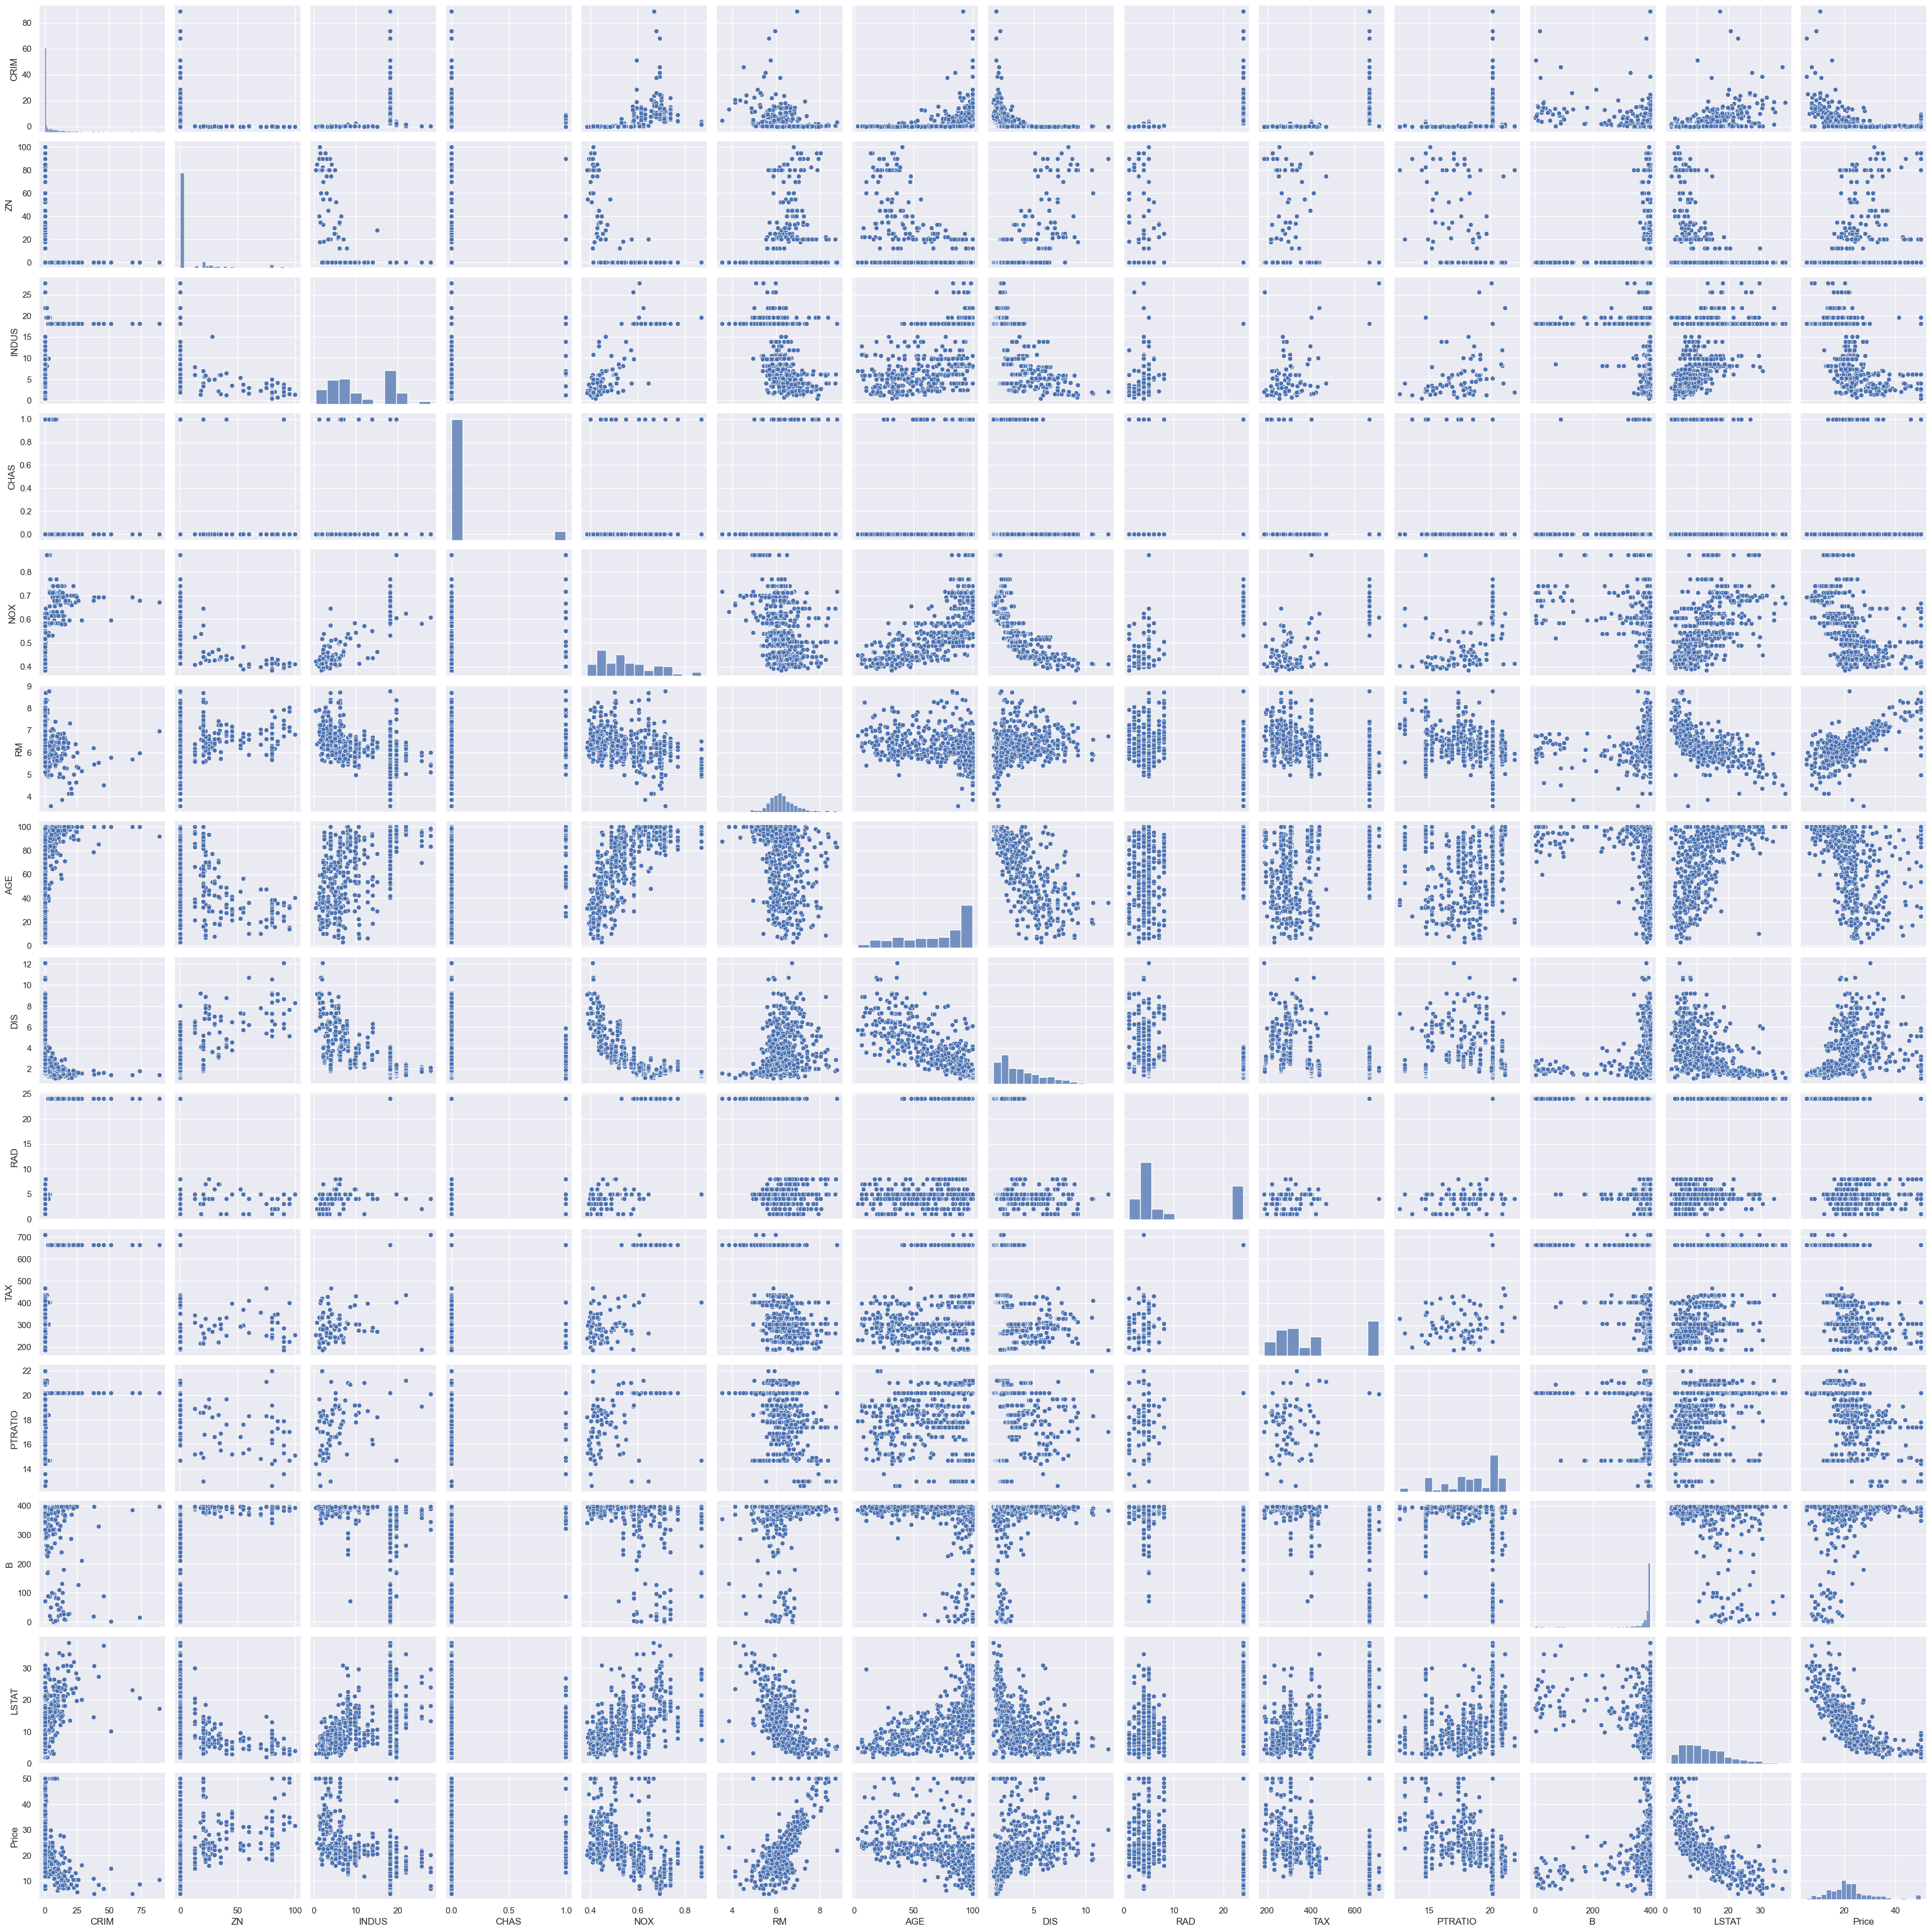

In [51]:
sns.pairplot(df_boston)

## Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable price. We will use the distplot function from the seaborn library.

C:\Users\KhadijehValipour\AppData\Local\Temp\ipykernel_4008\1661550711.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_boston['Price'], bins=30)


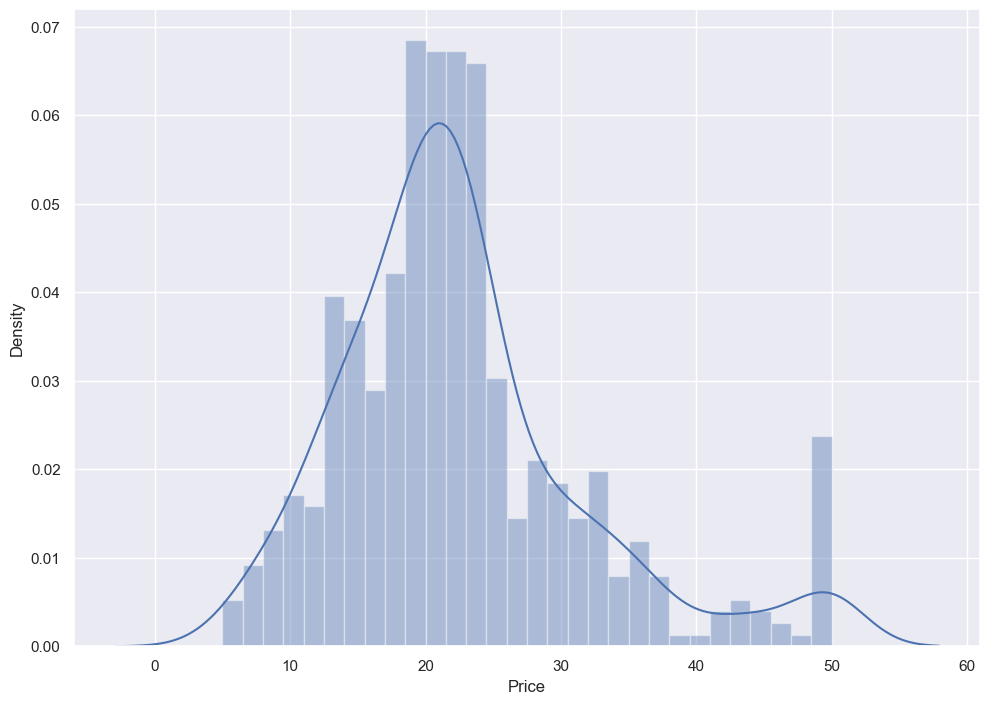

In [52]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['Price'], bins=30)
plt.show()

## This dataset has 13 features for each house. According to data correlation and your analysis, choose 2 features for X, for example:
- X = area and age 
### and choose 1 target for Y:
- Y = price

## Preparing the data for training the model
    We concatenate the ZN and RM columns using np.c_ provided by the numpy library.

In [53]:
X = pd.DataFrame(np.c_[df_boston['ZN'] , df_boston['RM']] , columns=['ZN' , 'RM'])

Y = df_boston['Price']

In [54]:
X

,ZN,RM
0,18.0,6.575
1,0.0,6.421
2,0.0,7.185
3,0.0,6.998
4,0.0,7.147
...,...,...
501,0.0,6.593
502,0.0,6.120
503,0.0,6.976
504,0.0,6.794


In [55]:
X_np = X.to_numpy()
Y_np = Y.to_numpy()

In [56]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size =0.2 , random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [57]:
X_train.reset_index()

,index,ZN,RM
0,33,0.0,5.701
1,283,90.0,7.923
2,418,0.0,5.957
3,502,0.0,6.120
4,402,0.0,6.404
...,...,...,...
399,486,0.0,6.114
400,189,45.0,7.185
401,495,0.0,5.670
402,206,0.0,6.326


In [58]:
from lls_class import LLS 

lls = LLS()
W = lls.fit(X_train ,Y_train)
W

0    0.111663
1    3.439771
dtype: float64

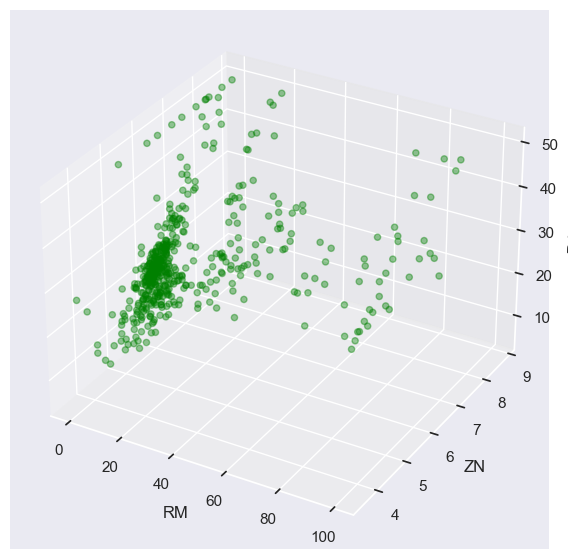

In [59]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_boston['ZN'] , df_boston['RM'] ,df_boston['Price'] , c='green' , marker='o' , alpha=0.4)
xx ,yy =np.meshgrid(df_boston['RM'] ,df_boston['ZN'])
ax.set_xlabel('RM')
ax.set_ylabel('ZN')
ax.set_zlabel('Price')
plt.show()

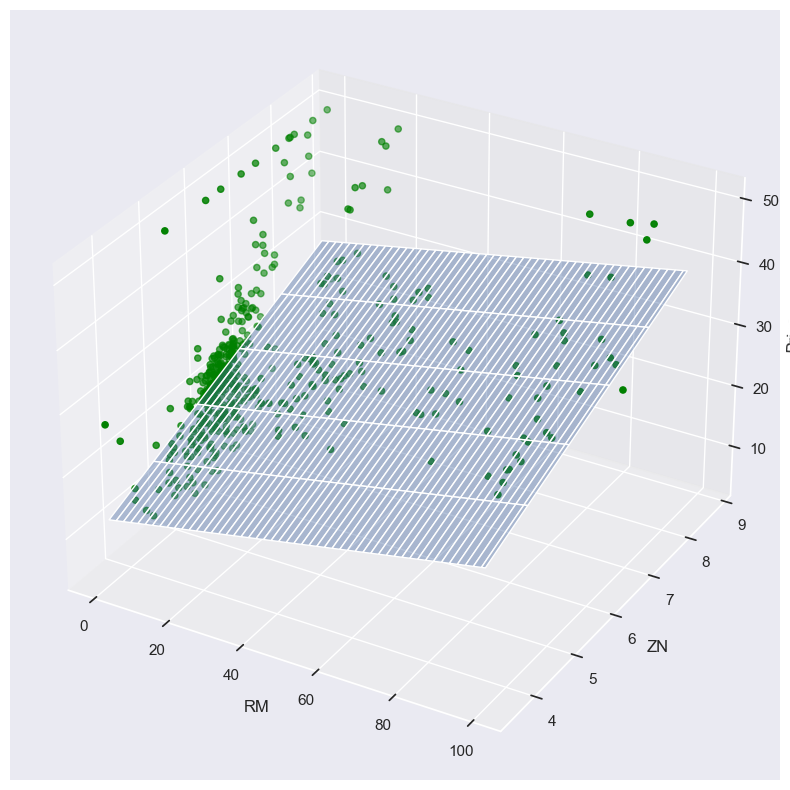

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

x_arange = np.arange(X_np[:,0].min(), X_np[:,0].max())
y_arange = np.arange(X_np[:,1].min(), X_np[:,1].max())
px, py = np.meshgrid(x_arange, y_arange)
 
pz = px * W[0] + py * W[1]
ax.plot_surface(px, py, pz, alpha = 0.4)
ax.scatter(X_np[:,0], X_np[:,1], Y_np , c="green" , marker='o')
ax.set_xlabel('RM')
ax.set_ylabel('ZN')
ax.set_zlabel('Price')
plt.show()